# welcome 


### Data description 
### Main dataset: 
### This dataset informs the medical situation of individuals segregation the observations by municipality, serializing them and providing income data of each one of them. Also, it provides an specific score about overall health & the case of an specific condition.

reading the data set and taking how many null exist 


In [2]:
import pandas as pd 
url3 = r"Main_Dataset.csv"
md = pd.read_csv(url3)
nule_values_md = md[md.isnull().any(axis=1)]

Getting ride of the nule values in order to perform god plots
- merged is a intermidate table 
- symmetric diff is the table without nule observations so we can develop better ploting 
- md is the base data set


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Perform FULL OUTER JOIN with indicator
merged = md.merge(nule_values_md, on="ID", how="outer", indicator=True)

# Exclude intersection (i.e., rows present in both df1 and df2)
symmetric_diff = merged[merged["_merge"] != "both"].drop(columns=["_merge"])
symmetric_diff = symmetric_diff.drop(symmetric_diff.columns[12:23], axis=1)


category_counts = symmetric_diff['Medical_Condition_x'].value_counts()
category_counts = category_counts.loc[category_counts.index != "Healthy"]


Creation of the plot


/tmp/ipykernel_13853/4238464545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


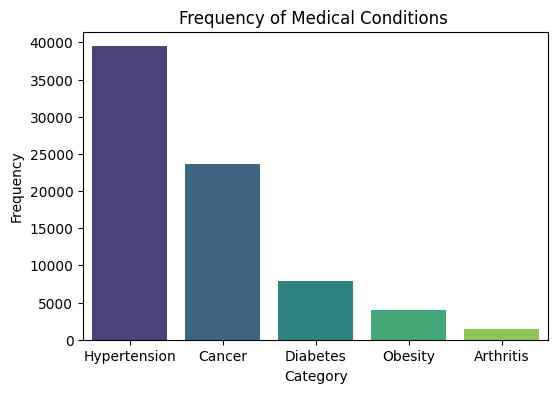

In [7]:
# Create bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Frequency of Medical Conditions ")
plt.show()

In [ ]:
url2 = r"Sociodemographics Data.csv"
sd = pd.read_csv(url2)
nule_values_sd = sd[sd.isnull().any(axis=1)]

In [6]:

url1 = r"Municipality Pollution Data.csv"
mu = pd.read_csv(url1)
nule_values_mu = mu[mu.isnull().any(axis=1)]

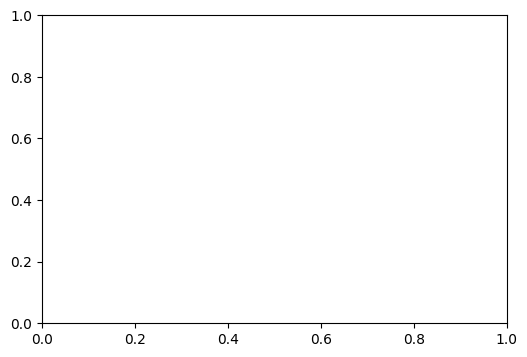

In [8]:




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

# Load dataset (replace 'data.csv' with your actual file)
  

# Get unique municipalities
municipalities = sorted(md["Municipality"].unique())

# Set up the figure
fig, ax = plt.subplots(figsize=(6, 4))

# Function to update the plot
def update(frame):
    ax.clear()  # Clear the previous frame
    current_municipality = municipalities[frame % len(municipalities)]
    
    # Filter data for current municipality
    df_muni = md[mdº["Municipality"] == current_municipality]
    
    # Count occurrences of each category
    category_counts = df_muni["Medical_Condition"].value_counts()
    
    # Create bar plot
    sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis", ax=ax)
    
    # Labels and title
    ax.set_xlabel("Category")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Frequency of Medical Conditions in {current_municipality}")

# Create animation (change every 3 sec = 3000ms)
ani = animation.FuncAnimation(fig, update, frames=len(municipalities), interval=3000, repeat=True)

plt.show()
